Please enter a set of numbers: 16


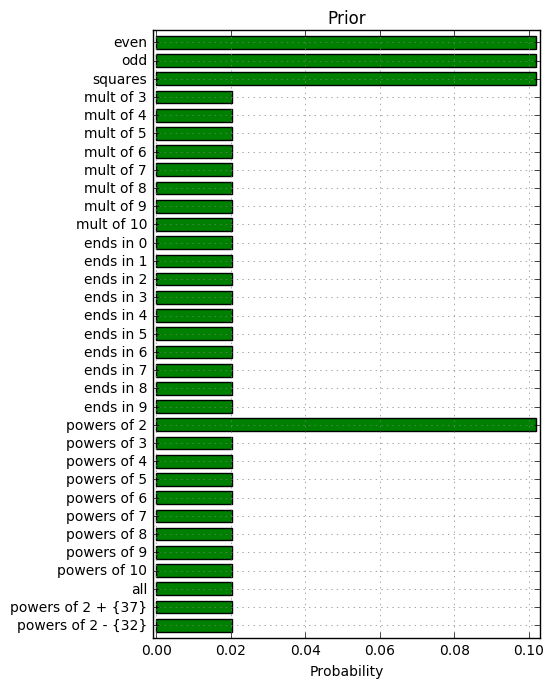

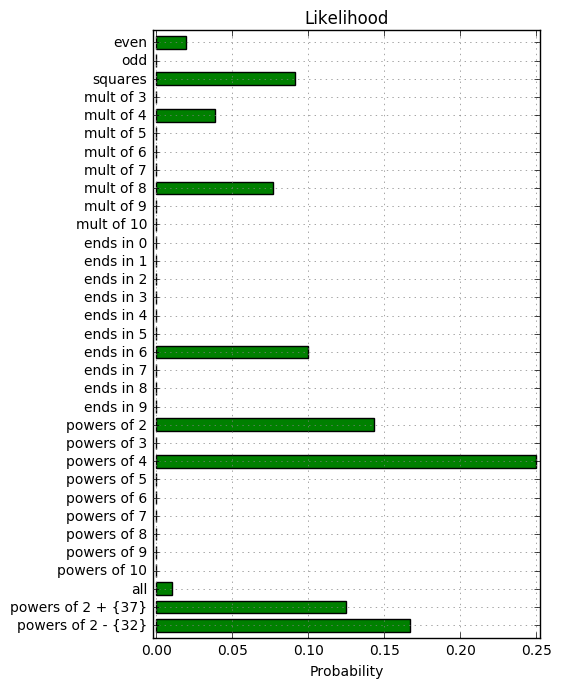

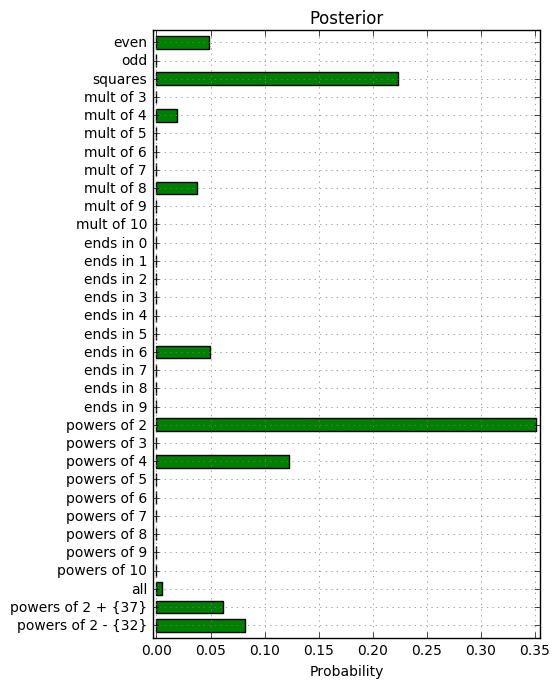

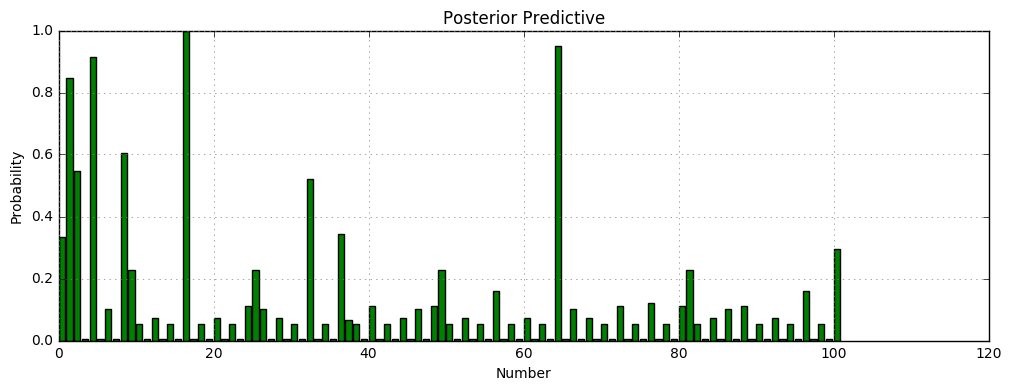

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import array
import math

def get_concept_names():
    concepts = [
    # even odd
    "even", "odd", "squares",
    # multiples of n
    "mult of 3","mult of 4","mult of 5","mult of 6","mult of 7","mult of 8","mult of 9","mult of 10",
    # ends in n
    "ends in 0","ends in 1","ends in 2","ends in 3","ends in 4","ends in 5","ends in 6","ends in 7",
    "ends in 8","ends in 9",
    # powers of n
    "powers of 2","powers of 3","powers of 4","powers of 5","powers of 6","powers of 7","powers of 8",
    "powers of 9","powers of 10",
    # all
    "all",
    # unnatural
    "powers of 2 + {37}",
    "powers of 2 - {32}"]
    return concepts

def get_concept_values():
    unnatural_plus37 = get_powers(2)
    unnatural_plus37.append(37)

    unnatural_minus32 = get_powers(2)
    unnatural_minus32.remove(32)
        
    concept_values = [get_even(), get_odd(), get_squares(),
                     get_mult(3), get_mult(4), get_mult(5), get_mult(6), get_mult(7), 
                     get_mult(8), get_mult(9), get_mult(10),
                     get_ends(0), get_ends(1), get_ends(2),get_ends(3),get_ends(4),
                     get_ends(5), get_ends(6), get_ends(7),get_ends(8),get_ends(9),
                     get_powers(2),get_powers(3),get_powers(4),get_powers(5),get_powers(6),
                     get_powers(7),get_powers(8),get_powers(9),get_powers(10), 
                     get_all(),
                     unnatural_plus37,
                     unnatural_minus32]
    
    return concept_values

def get_all():
    return ([i for i in range(0, 101, 1)])

def get_ends(end):
    return ([i for i in range(end, 101, 10)])

def get_odd():
    return ([i for i in range(0, 101) if i % 2 == 1])

def get_even():
    return ([i for i in range(0, 101) if i % 2 == 0])

def get_squares():
     return ([i**2 for i in range(0, 101) if i**2 <101])

def get_mult(mult):
    multiples = [i for i in range(mult, 101, mult) if i % mult == 0]
    multiples.append(0)
    return (multiples)

def get_powers(power):
    return ([power**i for i in range(0, 101) if power**i < 101])

def plot_bar_vertical(x, y):
    
    #plt.xlabel("Date")
    #plt.ylabel("Sales $")
    #plt.legend(['Store #1 Sales'], loc='upper right')
    
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12 #width
    fig_size[1] = 4 #height
    plt.rcParams["figure.figsize"] = fig_size

    plt.bar(x, y, color="green")
    plt.grid(True, color = "gray")
    
    plt.title("Posterior Predictive")
    plt.xlabel('Number')
    plt.ylabel('Probability')
    plt.show()
    
def plot_bar_horizontal(x, y, labels=[],title = ""):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    fig_size[0] = 5 #width
    fig_size[1] = 7.5 #height
    plt.rcParams["figure.figsize"] = fig_size
    
    y = np.flipud(y) 
    labels = np.flipud(labels)
    plt.barh(x, y, height=0.7, align='center', color="green")
    
    plt.yticks(x, labels, rotation='horizontal')

    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.01)

    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.09)

    plt.grid(True, color = "gray")
    plt.title(title)
    plt.xlabel('Probability')
    plt.show()
    
    
def indicator(val, concept):
    if val in concept:
        return True
    return False
    
    
def computePrior(concepts):
    prior = np.ones(( len(concepts)))
    prior[0] = 5
    prior[1] = 5
    prior[2] = 5
    prior[21] = 5
    prior = prior / np.sum(prior)
    return prior

def computeLikelihood(concepts):
    #ones = np.ones(len(concepts))

    likelihood = np.zeros(len(concepts))
    for i in xrange(0, len(concepts)):
        if set(concepts[i]).issuperset(set(input_)):
            likelihood[i] = (1.0 / len(concepts[i])) ** len(input_)
    #do not normalize=> distribution is over data in concepts
    return likelihood

def computePosterior(concepts, prior, likelihood):
    posterior = likelihood * prior 
    posterior = posterior / np.sum(posterior)
    return posterior

def computePredictive(concepts, prior, likelihood, posterior):
    predictive = np.zeros(101)
    for i in xrange(0, 101):
        for c in xrange(len(concepts)):
            if indicator(i, concepts[c]):
                predictive[i] += posterior[c]
        
    return predictive




# random input TODO: allow user input
input_ = input('Please enter a set of numbers: ')

if isinstance( input_, int ):
    input_ = [input_]
else:
    list(input_)
    

concept_names = get_concept_names()
concepts = get_concept_values()

# for i in xrange(0, len(concepts)):
#     con = concepts[i]
#     name = concept_names[i]
#     print name, ":", len(con), ": ", con
#     print ""

x = range(0,len(concept_names))

prior = computePrior(concepts)
plot_bar_horizontal(x, prior,concept_names, title="Prior")

likelihood = computeLikelihood(concepts)
plot_bar_horizontal(x, likelihood, labels=concept_names, title="Likelihood")

posterior = computePosterior(concepts, prior, likelihood)
plot_bar_horizontal(x, posterior, labels=concept_names, title="Posterior")

predictive = computePredictive(concepts, prior, likelihood, posterior)
plot_bar_vertical(range(0,101), predictive)

        
